In [47]:
import sys #only needed to determine Python version number
import matplotlib as mpl
import warnings
# importing pandas modul
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

import statsmodels.api as sm

#import re    # regular expressions

In [48]:
print('Environment \n----------------------------------------------------------------------------------------------')
print('Python: version ' + sys.version)
print('Pandas: version ' + pd.__version__)
print('Matplotlib: version ' + mpl.__version__)

Environment 
----------------------------------------------------------------------------------------------
Python: version 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Pandas: version 0.25.0
Matplotlib: version 3.0.2


In [49]:
# Environment
warnings.filterwarnings("ignore")

# Pandas configuration
#pd.set_option('display.max_row', 20)
pd.set_option('precision', 4)

# Plot configuration
plt.figure(figsize=(16, 6))
plt.style.use('fivethirtyeight')

# Seaborn configuration
sns.set(color_codes=True)

# Enable inline plotting
%matplotlib inline

mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.figsize'] = 11.7,8.27
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [50]:
# making data frame from csv file 
lst_properties = []
def concatFiles(carpeta):
    for archivo in os.listdir(carpeta):
        filename = os.path.join(carpeta,archivo) 
        print('Reading... ' + os.path.basename(filename))
        add_df = pd.read_csv(filename, sep=',', encoding='utf-8', header=0, na_values=['NA'])
        lst_properties.append(add_df)
 
concatFiles(".\\address\\")    

Reading... 20190729_170027_Booking_Valencia.csv
Reading... 20190729_202026_Booking_Valencia.csv
Reading... 20190729_204712_Booking_Valencia.csv
Reading... 20190730_084951_Booking_Valencia.csv
Reading... 20190731_212426_Booking_Valencia.csv
Reading... 20190803_104436_Booking_Valencia.csv
Reading... 20190804_192707_Booking_Valencia.csv
Reading... 20190813_164042_Booking_Valencia.csv


In [51]:
df_prop_1 = pd.concat(lst_properties, axis=0, ignore_index=True)

In [52]:
df_prop_1.head()

,propertyId,name,propertyType,district,coords
0,2526514,Friendly rentals Enesco Beach,Apartamento,"Poblados marítimos, Valencia","-0.327299100000005,39.4776179"
1,1634254,Friendly Rentals Danna,Apartamento,"Ciutat Vella, Valencia","-0.374956727027893,39.4710692857104"
2,3297078,Precioso piso junto al antiguo barrio de Campanar,Apartamento,"Campanar, Valencia","-0.399741,39.483996"
3,337092,Valencia Luxury Attics Ayuntamiento,Apartamentos,"Ciutat Vella, Valencia","-0.37772074341774,39.4713653693859"
4,1979067,MD Pelayo with terrace,Apartamento,"Extramurs, Valencia","-0.379127700000026,39.4655893"


In [53]:
print("Shape of data: {}".format(df_prop_1.shape))

Shape of data: (3387, 5)


In [54]:
# Eliminate district null
df_prop_1 = df_prop_1[pd.notnull(df_prop_1['district'])]
# Eliminate propertyType null
df_prop_1 = df_prop_1[pd.notnull(df_prop_1['propertyType'])]

In [55]:
print("Shape of data: {}".format(df_prop_1.shape))

Shape of data: (2858, 5)


In [56]:
df_prop_1.sort_values("propertyId", inplace = True)

In [57]:
print("Shape of data: {}".format(df_prop_1.shape))

Shape of data: (2858, 5)


In [58]:
df_prop_1.head(10)

,propertyId,name,propertyType,district,coords
2584,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
3157,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
1684,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
844,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
303,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
2417,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
2024,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
1301,12656,Sol Playa,Hotel,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551"
2521,13270,Melia Plaza Valencia,Hotel,"Ciutat Vella, Valencia","-0.376952290534973,39.4710278753057"
1476,13270,Melia Plaza Valencia,Hotel,"Ciutat Vella, Valencia","-0.376952290534973,39.4710278753057"


In [59]:
df_prop_1['district'] = df_prop_1['district'].str.strip()
df_prop_1[['longitude','latitude']] = df_prop_1.coords.str.split(',',expand=True)
df_prop_1[['tmpDistrict','locality']] = df_prop_1.district.str.split(',',expand=True)

In [60]:
df_prop_1.drop(columns=['district', 'coords', 'locality'], inplace = True)

In [61]:
df_prop_1.rename(columns={'tmpDistrict': 'district'}, inplace = True)

In [62]:
# Converting propertyType to categorical
df_prop_1['propertyType'] = df_prop_1.propertyType.astype('category')

In [63]:
df_prop_1.propertyType.unique().tolist()

['Hotel',
 'Apartahotel',
 'Apartamentos',
 'Apartamento',
 'Albergue',
 'Hostal o pensión',
 'Bed & breakfast',
 'Residencia de estudiantes',
 'Casa o chalet',
 'Habitación en casa particular',
 'Casas y chalets',
 'Tented camp',
 'Barco',
 'Camping']

In [64]:
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Apartamentos','Apartamento')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Casa o chalet','Casa/Chalet')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Casas y chalets','Casa/Chalet')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Apartahotel','ApartHotel')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Bed & breakfast','B&B')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Habitación en casa particular','Habitacion')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Residencia de estudiantes','Residencia')
df_prop_1['propertyType'] = df_prop_1['propertyType'].replace('Hostal o pensión','Hostal/Pension')

In [65]:
df_prop_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 2584 to 3170
Data columns (total 6 columns):
propertyId      2858 non-null int64
name            2858 non-null object
propertyType    2858 non-null object
longitude       2858 non-null object
latitude        2858 non-null object
district        2858 non-null object
dtypes: int64(1), object(5)
memory usage: 156.3+ KB


In [66]:
#data[data['netPrice'] == data.groupby('name')['netPrice'].transform('max')]
df_prop_1.loc[df_prop_1['name'].str.contains('Apartament'), 'propertyType'] = 'Apartamento'
df_prop_1.loc[df_prop_1['name'].str.contains('Apartment'), 'propertyType'] = 'Apartamento'
df_prop_1.loc[df_prop_1['name'].str.contains('flats'), 'propertyType'] = 'Apartamento'
df_prop_1.loc[df_prop_1['name'].str.contains('rentals'), 'propertyType'] = 'Apartamento'
df_prop_1.loc[df_prop_1['name'].str.contains('Rentals'), 'propertyType'] = 'Apartamento'
df_prop_1.loc[df_prop_1['name'].str.contains('Hostal'), 'propertyType'] = 'Hostal/Pension'

In [67]:
df_prop_1.set_index('propertyId', inplace = True)

In [68]:
df_prop_1.head()

,name,propertyType,longitude,latitude,district
propertyId,,,,,
12656,Sol Playa,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos
12656,Sol Playa,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos
12656,Sol Playa,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos
12656,Sol Playa,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos
12656,Sol Playa,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos


In [69]:
df_prop_1.drop(columns=['name'], inplace=True)

In [70]:
# dropping ALL duplicated values except first occurrence
df_prop_1.drop_duplicates(keep = 'first', inplace = True) 

In [71]:
df_prop_1.loc[[14580,17344]]

,propertyType,longitude,latitude,district
propertyId,,,,
14580,Hotel,-0.323579013347626,39.4637061283809,Poblados marítimos
17344,ApartHotel,-0.400978177785873,39.4935991016437,Benicalap


In [72]:
# Districts
district_names = np.sort(df_prop_1.district.unique().tolist())
district_names

array(['Algirós', 'Benicalap', 'Benimaclet', 'Camins al Grau', 'Campanar',
       'Ciutat Vella', 'Eixample', 'El Pla del Real', 'Extramurs',
       'Jesús', 'La Saïdia', 'Olivereta', 'Patraix',
       'Playa de la Malvarrosa', 'Poblados marítimos', 'Quatre Carreres',
       'Rascanya', 'Valencia'], dtype='<U22')

In [73]:
# Check for null values in the dataset
print(df_prop_1.isnull().sum())

propertyType    0
longitude       0
latitude        0
district        0
dtype: int64


In [74]:
#df_prop_1[df_prop_1['propertyType'].isnull()]

In [75]:
# making data frame from csv file 
lst_hotels = []
def concatFiles(carpeta):
    for archivo in os.listdir(carpeta):
        filename = os.path.join(carpeta,archivo) 
        print('Reading file <' + os.path.basename(filename) + '>')
        temp_df = pd.read_csv(filename, sep=',', encoding='utf-8', \
                       header=0, parse_dates=['checkIn','checkOut'], dayfirst=False, na_values=['NA'])
        #df['filename'] = os.path.basename(filename)
        lst_hotels.append(temp_df)
 
concatFiles(".\\data\\")

Reading file <20190722_225212_Booking_Valencia_7.csv>
Reading file <20190722_225230_Booking_Valencia_14.csv>
Reading file <20190722_225248_Booking_Valencia_30.csv>
Reading file <20190722_225302_Booking_Valencia_60.csv>
Reading file <20190722_225315_Booking_Valencia_90.csv>
Reading file <20190723_212717_Booking_Valencia_7.csv>
Reading file <20190723_212756_Booking_Valencia_14.csv>
Reading file <20190723_212809_Booking_Valencia_30.csv>
Reading file <20190723_212901_Booking_Valencia_60.csv>
Reading file <20190723_212917_Booking_Valencia_90.csv>
Reading file <20190724_092126_Booking_Valencia_7.csv>
Reading file <20190724_092145_Booking_Valencia_14.csv>
Reading file <20190724_092208_Booking_Valencia_30.csv>
Reading file <20190724_092244_Booking_Valencia_60.csv>
Reading file <20190724_092306_Booking_Valencia_90.csv>
Reading file <20190725_124219_Booking_Valencia_7.csv>
Reading file <20190725_124243_Booking_Valencia_14.csv>
Reading file <20190725_160420_Booking_Valencia_30.csv>
Reading file <

Reading file <20190824_172928_Booking_Valencia_7.csv>
Reading file <20190824_172941_Booking_Valencia_14.csv>
Reading file <20190824_172959_Booking_Valencia_30.csv>
Reading file <20190824_173027_Booking_Valencia_60.csv>
Reading file <20190824_173046_Booking_Valencia_90.csv>
Reading file <20190825_173102_Booking_Valencia_7.csv>
Reading file <20190825_173116_Booking_Valencia_14.csv>
Reading file <20190825_173138_Booking_Valencia_30.csv>
Reading file <20190825_173154_Booking_Valencia_60.csv>
Reading file <20190825_173207_Booking_Valencia_90.csv>


In [76]:
df_prop_2 = pd.concat(lst_hotels, axis=0, ignore_index=True)
print("Shape of data: {}".format(df_prop_2.shape))

Shape of data: (62832, 12)


In [77]:
df_prop_2.reset_index()
# the check-in column is set as index column
df_prop_2.set_index('propertyId', inplace = True)
#hotels_df.set_index('checkIn', inplace = True)

In [78]:
# Preview the last 5 lines of the loaded data 
df_prop_2.tail(5)

,name,propertyType,city,rooms,days,price,checkIn,checkOut,stars,score,advance
propertyId,,,,,,,,,,,
4005334,Apartamento Alguer,NaN,Valencia,1,1,€ 145,2019-11-23,2019-11-24,0,"7,5",90
4768322,Kirei Apartment Calgary,NaN,Valencia,1,1,€ 148,2019-11-23,2019-11-24,0,"7,6",90
4552106,Old Town Flats Casa Burguerini,NaN,Valencia,1,1,€ 151,2019-11-23,2019-11-24,0,"7,6",90
2174625,Apartamento Angel Alcazar 35,NaN,Valencia,1,1,€ 175,2019-11-23,2019-11-24,0,"7,5",90
4932621,Loft el Carmen amazing views,NaN,Valencia,1,1,€ 182,2019-11-23,2019-11-24,0,"7,9",90


In [79]:
df_prop_2[['currency','netPrice']] = df_prop_2.price.str.split(expand=True) 

In [80]:
df_prop_2.head(5)

,name,propertyType,city,rooms,days,price,checkIn,checkOut,stars,score,advance,currency,netPrice
propertyId,,,,,,,,,,,,,
570027,Lotelito,Hotel,Valencia,1,1,€ 89,2019-07-29,2019-07-30,0,"8,9",7,€,89
5300418,Miresa flats,Apartamento,Valencia,1,1,€ 125,2019-07-29,2019-07-30,0,NaN,7,€,125
1719003,Travel Habitat Teatro Principal,Apartamentos,Valencia,1,1,NaN,2019-07-29,2019-07-30,0,9,7,NaN,NaN
1619029,MYR Hotel Plaza Mercado & Spa,Apartahotel,Valencia,1,1,€ 124,2019-07-29,2019-07-30,0,"9,2",7,€,124
5399747,Miresa flats 2.1A,Apartamento,Valencia,1,1,€ 90,2019-07-29,2019-07-30,0,NaN,7,€,90


In [81]:
# We delete propertyType because we will get it with a merge
df_prop_2.drop(columns=['price', 'rooms', 'days', 'currency', 'city', 'propertyType'], inplace=True)

In [82]:
# Casting Price to float
df_prop_2['netPrice'] = df_prop_2.netPrice.astype('float32')

In [83]:
# Casting stars to object
df_prop_2['stars'] = df_prop_2.stars.astype('str')

In [84]:
df_prop_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62832 entries, 570027 to 4932621
Data columns (total 7 columns):
name        62832 non-null object
checkIn     62832 non-null datetime64[ns]
checkOut    62832 non-null datetime64[ns]
stars       62832 non-null object
score       58373 non-null object
advance     62832 non-null int64
netPrice    55943 non-null float32
dtypes: datetime64[ns](2), float32(1), int64(1), object(3)
memory usage: 3.6+ MB


In [85]:
# Replacing names of stars
df_prop_2['stars'] = df_prop_2['stars'].replace('0', 'Non star')
df_prop_2['stars'] = df_prop_2['stars'].replace('1', '1 star')
df_prop_2['stars'] = df_prop_2['stars'].replace('2', '2 star')
df_prop_2['stars'] = df_prop_2['stars'].replace('3', '3 star')
df_prop_2['stars'] = df_prop_2['stars'].replace('4', '4 star')
df_prop_2['stars'] = df_prop_2['stars'].replace('5', '5 star')

In [86]:
df_prop_2[df_prop_2['stars']=='5 star'].head()

,name,checkIn,checkOut,stars,score,advance,netPrice
propertyId,,,,,,,
91144,Las Arenas Balneario Resort,2019-07-30,2019-07-31,5 star,9,7,297.0
348132,Caro Hotel,2019-07-30,2019-07-31,5 star,"9,2",7,495.0
91497,SH Valencia Palace,2019-07-30,2019-07-31,5 star,"8,5",7,135.0
93823,Hospes Palau de La Mar,2019-07-30,2019-07-31,5 star,"8,8",7,212.0
93321,The Westin Valencia,2019-07-30,2019-07-31,5 star,"8,7",7,213.0


In [87]:
# Casting stars object to categorical
df_prop_2['stars'] = df_prop_2.stars.astype('category')

In [88]:
# Merging hotel data + property data (district, latitude, longitude, propertyType)
df_properties = pd.merge(df_prop_2, df_prop_1, on='propertyId', how='outer')

In [89]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63357 entries, 570027 to 4895097
Data columns (total 11 columns):
name            63336 non-null object
checkIn         63336 non-null datetime64[ns]
checkOut        63336 non-null datetime64[ns]
stars           63336 non-null category
score           58658 non-null object
advance         63336 non-null float64
netPrice        56447 non-null float32
propertyType    52440 non-null object
longitude       52440 non-null object
latitude        52440 non-null object
district        52440 non-null object
dtypes: category(1), datetime64[ns](2), float32(1), float64(1), object(6)
memory usage: 5.1+ MB


In [90]:
# Sorting data by propertyId and checkIn date
df_properties.sort_values(by=['propertyId','checkIn'], inplace=True)
#df_properties.sort_values(by=['propertyId'], inplace=True)

In [91]:
df_properties.head(15)

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district
propertyId,,,,,,,,,,,
12120,Living Valencia Apartments - Merced,2019-08-01,2019-08-02,Non star,"8,3",7.0,182.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-08-03,2019-08-04,Non star,"8,3",7.0,153.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-08-09,2019-08-10,Non star,"8,3",14.0,182.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-08-11,2019-08-12,Non star,"8,3",14.0,175.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-08-11,2019-08-12,Non star,"8,4",7.0,162.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-08-19,2019-08-20,Non star,"8,4",14.0,162.0,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-11-20,2019-11-21,Non star,"8,4",90.0,NaN,NaN,NaN,NaN,NaN
12120,Living Valencia Apartments - Merced,2019-11-21,2019-11-22,Non star,"8,4",90.0,NaN,NaN,NaN,NaN,NaN
12656,Sol Playa,2019-07-30,2019-07-31,2 star,"8,3",7.0,85.0,Hotel,-0.323789566755295,39.4650841913551,Poblados marítimos


In [92]:
df_properties.drop_duplicates(keep='first', inplace=True)

In [93]:
df_properties['score'] = df_properties['score'].str.replace(',','.')
df_properties['score'] = pd.to_numeric(df_properties['score']).round(1)

In [94]:
# Scores
np.sort(df_properties.score.unique())

array([ 3.3,  3.4,  3.8,  3.9,  4. ,  4.1,  4.5,  4.6,  4.7,  4.8,  4.9,
        5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. ,  nan])

In [95]:
df_properties['longitude'] = df_properties.longitude.astype('float32')
df_properties['latitude'] = df_properties.latitude.astype('float32')

In [96]:
print("Shape of data: {}".format(df_properties.shape))

Shape of data: (62137, 11)


In [97]:
# Eliminate attribute name NaN
df_properties = df_properties[pd.notnull(df_properties['name'])]
# Eliminate attribute netPrice NaN
df_properties = df_properties[pd.notnull(df_properties['netPrice'])]

In [98]:
print("Shape of data: {}".format(df_properties.shape))

Shape of data: (56030, 11)


In [99]:
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56030 entries, 12120 to 5535333
Data columns (total 11 columns):
name            56030 non-null object
checkIn         56030 non-null datetime64[ns]
checkOut        56030 non-null datetime64[ns]
stars           56030 non-null category
score           51421 non-null float64
advance         56030 non-null float64
netPrice        56030 non-null float32
propertyType    47896 non-null object
longitude       47896 non-null float32
latitude        47896 non-null float32
district        47896 non-null object
dtypes: category(1), datetime64[ns](2), float32(3), float64(2), object(3)
memory usage: 4.1+ MB


In [100]:
#df_properties.describe(include="all")
df_properties.describe()

,score,advance,netPrice,longitude,latitude
count,51421.0000,56030.0000,56030.0000,47896.0000,47896.0000
mean,8.2520,43.4105,119.1583,-0.3721,39.4870
std,0.9768,31.1865,81.7586,0.0293,0.0248
min,3.3000,7.0000,1.0200,-0.7780,38.9126
25%,7.8000,14.0000,70.0000,-0.3802,39.4643
50%,8.4000,30.0000,101.0000,-0.3758,39.4715
75%,8.9000,60.0000,140.0000,-0.3639,39.4757
max,10.0000,90.0000,999.0000,-0.1426,39.6495


Mean Price: 119,63€  
Min Price: 1.1180 ?  
Max Price: 999 ?

In [101]:
minPrice = df_properties['netPrice'].idxmin()
maxPrice = df_properties['netPrice'].idxmax()

In [102]:
print("Shape of data: {}".format(minPrice))
# Selection by position
df_properties.loc[[minPrice]]

Shape of data: 5374850


,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district
propertyId,,,,,,,,,,,
5374850,MD PASEO RUZAFA CENTER,2019-08-01,2019-08-02,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-02,2019-08-03,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-03,2019-08-04,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-04,2019-08-05,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-05,2019-08-06,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-08,2019-08-09,Non star,NaN,14.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-10,2019-08-11,Non star,NaN,14.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-10,2019-08-11,Non star,NaN,7.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella
5374850,MD PASEO RUZAFA CENTER,2019-08-11,2019-08-12,Non star,NaN,14.0,502.00,Apartamento,-0.3752,39.4684,Ciutat Vella


In [103]:
# Converts the first character of each word to upper case
df_properties['name'] = df_properties['name'].str.title()

In [104]:
df_properties['weekday'] = df_properties.checkIn.dt.weekday_name

In [105]:
#df_properties['month'] = df_properties.checkIn.dt.month
df_properties['month'] = df_properties.checkIn.dt.strftime("%B")

In [106]:
# Check for null values in the dataset
print(df_properties.isnull().sum())

name               0
checkIn            0
checkOut           0
stars              0
score           4609
advance            0
netPrice           0
propertyType    8134
longitude       8134
latitude        8134
district        8134
weekday            0
month              0
dtype: int64


In [107]:
df_properties.iloc[10000:10010].head(5)

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
189277,Apartamentos Edificio Palomar,2019-10-28,2019-10-29,Non star,9.2,90.0,89.0,Apartamento,-0.3822,39.4757,Ciutat Vella,Monday,October
189277,Apartamentos Edificio Palomar,2019-10-29,2019-10-30,Non star,9.2,90.0,89.0,Apartamento,-0.3822,39.4757,Ciutat Vella,Tuesday,October
189277,Apartamentos Edificio Palomar,2019-10-30,2019-10-31,Non star,9.2,90.0,89.0,Apartamento,-0.3822,39.4757,Ciutat Vella,Wednesday,October
189277,Apartamentos Edificio Palomar,2019-10-31,2019-11-01,Non star,9.2,90.0,129.0,Apartamento,-0.3822,39.4757,Ciutat Vella,Thursday,October
189277,Apartamentos Edificio Palomar,2019-11-03,2019-11-04,Non star,9.2,90.0,89.0,Apartamento,-0.3822,39.4757,Ciutat Vella,Sunday,November


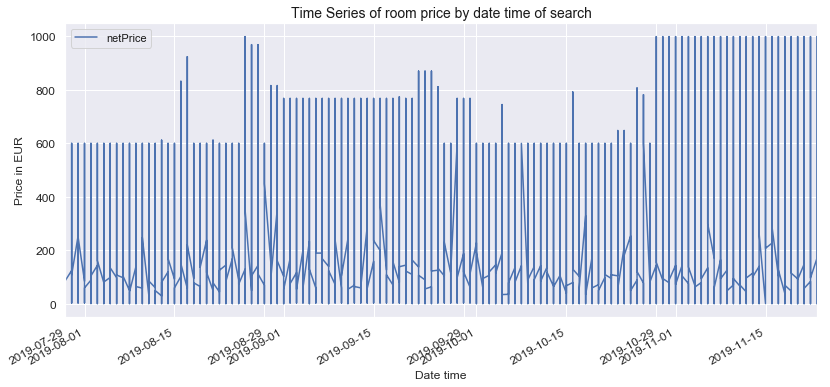

In [108]:
# Time Series Visualizations
df_properties.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price by date time of search');

### Las Arenas

In [109]:
df_Las_Arenas = df_properties.query("propertyId==91144")
#hotels.reset_index()

In [110]:
#hotels.loc[hotels['propertyId'] == 'Sol Playa']
df_Las_Arenas

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
91144,Las Arenas Balneario Resort,2019-07-30,2019-07-31,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Tuesday,July
91144,Las Arenas Balneario Resort,2019-07-31,2019-08-01,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Wednesday,July
91144,Las Arenas Balneario Resort,2019-08-01,2019-08-02,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Thursday,August
91144,Las Arenas Balneario Resort,2019-08-02,2019-08-03,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Friday,August
91144,Las Arenas Balneario Resort,2019-08-04,2019-08-05,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Sunday,August
91144,Las Arenas Balneario Resort,2019-08-05,2019-08-06,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Monday,August
91144,Las Arenas Balneario Resort,2019-08-06,2019-08-07,5 star,9.0,14.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Tuesday,August
91144,Las Arenas Balneario Resort,2019-08-06,2019-08-07,5 star,9.0,7.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Tuesday,August
91144,Las Arenas Balneario Resort,2019-08-07,2019-08-08,5 star,9.0,14.0,297.0,Hotel,-0.3247,39.4664,Poblados marítimos,Wednesday,August


In [111]:
df_Las_Arenas['netPrice'].describe()

count    148.0000
mean     255.0203
std       56.5240
min      144.0000
25%      198.0000
50%      277.0000
75%      288.0000
max      365.0000
Name: netPrice, dtype: float64

In [112]:
df_Las_Arenas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 91144 to 91144
Data columns (total 13 columns):
name            148 non-null object
checkIn         148 non-null datetime64[ns]
checkOut        148 non-null datetime64[ns]
stars           148 non-null category
score           148 non-null float64
advance         148 non-null float64
netPrice        148 non-null float32
propertyType    148 non-null object
longitude       148 non-null float32
latitude        148 non-null float32
district        148 non-null object
weekday         148 non-null object
month           148 non-null object
dtypes: category(1), datetime64[ns](2), float32(3), float64(2), object(5)
memory usage: 13.6+ KB


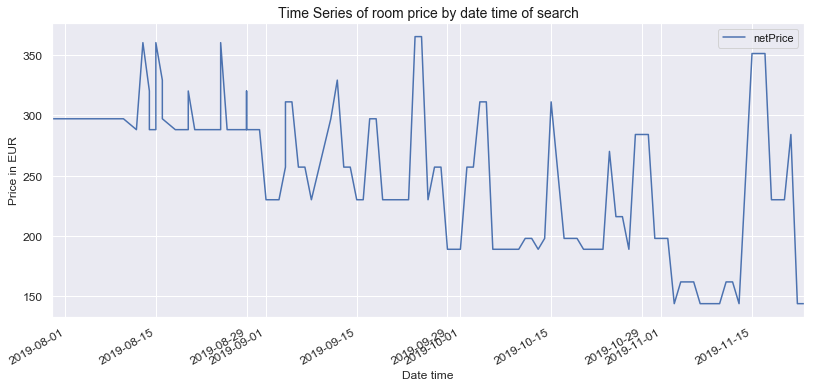

In [115]:
# Time Series Visualizations
#plt.set(xlim=(0, 900))
df_Las_Arenas.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price by date time of search');

In [90]:
df_non_sat = hotels.loc[hotels['weekday'] != 'Saturday', 'netPrice']
df_sat = hotels.loc[hotels['weekday'] == 'Saturday', 'netPrice']

In [91]:
df_sat.count()
print("Shape of data. Non-sat: {}  Sat:{}".format(df_non_sat.count(),df_sat.count()))

Shape of data. Non-sat: 42499  Sat:5068


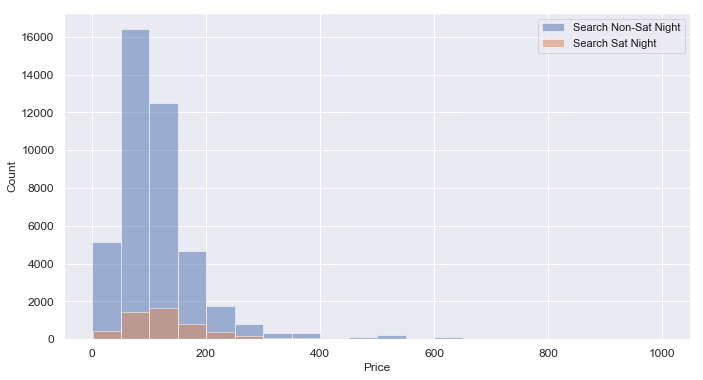

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(df_non_sat, bins = 20, alpha=0.5, label='Search Non-Sat Night')
plt.hist(df_sat, bins = 20, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show();

In [84]:
a.info()

AttributeError: 'Series' object has no attribute 'info'

In [85]:
ax = sns.countplot(y="propertyType", data=hotels, \
                   order = data['propertyType'].value_counts().index).set_title('Number of ocurrences')

NameError: name 'data' is not defined

### Hotels

In [313]:
hotels_df = hotels.query("propertyType=='Hotel'")
print("Observations per Hotel: \n\n{}".format(hotels_df.name.value_counts()))

Observations per Hotel: 

Hotel Malcom And Barret                   123
Hotel Kramer                              123
Md Modern Hotel - Jardines                122
Md Design Hotel - Portal Del Real         122
Vincci Palace                             121
                                         ... 
Hotel Miramar                              62
Hotel Villacarlos                          60
El Coso                                    59
Nest Style Valencia -Proxima Apertura-     59
Hotel Gabbeach                             41
Name: name, Length: 85, dtype: int64


In [314]:
print("Number of hotels analysed: {}".format(pd.unique(hotels_df.name).size))

Number of hotels analysed: 85


In [315]:
print("Number of days analysed: {}".format(pd.unique(hotels_df.checkIn).size))

Number of days analysed: 98


In [316]:
# Observations per day
by_day = (hotels_df.groupby("checkIn").size())
by_day

checkIn
2019-07-29    34
2019-07-30    78
2019-07-31    76
2019-08-01    79
2019-08-02    74
              ..
2019-11-09    76
2019-11-10    85
2019-11-11    83
2019-11-12    85
2019-11-13    84
Length: 98, dtype: int64

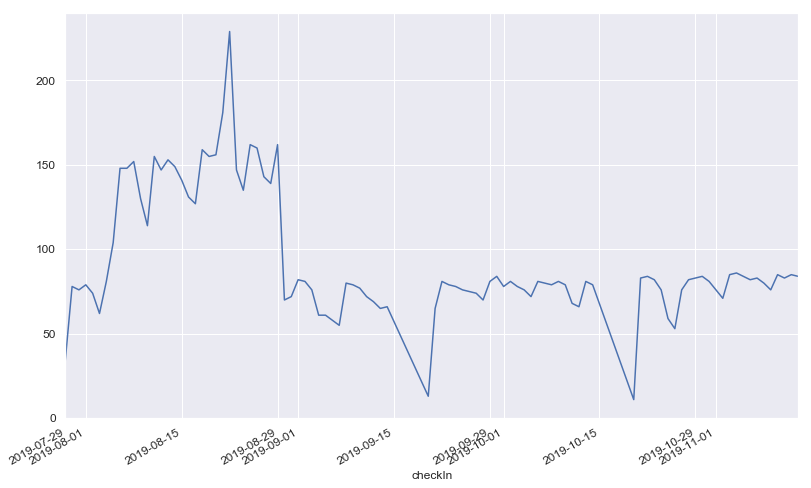

In [317]:
by_day.plot();

In [319]:
#plt.plot(x=by_day.checkIn, y=by_day.size())

In [321]:
print("Range days analysed: from {} to {}".format(hotels_df.checkIn.min(), hotels_df.checkIn.max()))

Range days analysed: from 2019-07-29 00:00:00 to 2019-11-13 00:00:00


In [322]:
ff = pd.unique(hotels_df.checkIn)
type(ff)

numpy.ndarray

In [323]:
ff
#ff.sort_values(by='checkIn')

array(['2019-07-30T00:00:00.000000000', '2019-07-31T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
       '2019-08-22T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-25T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
       '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-09-02T00:00:00.000000000',
       '2019-09-03T00:00:00.000000000', '2019-09-04T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-09-10

In [324]:
# Assign known district to some Hotels
hotels_df['district'].loc[(hotels_df['name']=='Sercotel Sorolla Palace')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='Silken Puerta Valencia')] = 'Camins al Grau'
hotels_df['district'].loc[(hotels_df['name']=='Tryp Valencia Feria')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='Hotel Beleret')] = 'Benicalap'
hotels_df['district'].loc[(hotels_df['name']=='You & Co. Saler Beach Boutique')] = 'El Saler'

### Weekday

In [325]:
weekday_names = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_mean = hotels_df[["weekday", "netPrice"]].groupby("weekday").mean()

In [326]:
# To be ordered by weekday
weekday_mean = weekday_mean.loc[weekday_names]
weekday_mean.netPrice

weekday
Monday       108.7545
Tuesday      116.9722
Wednesday    119.1427
Thursday     120.3052
Friday       131.4960
Saturday     135.3995
Sunday       100.8631
Name: netPrice, dtype: float32

In [327]:
weekday_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Monday to Sunday
Data columns (total 1 columns):
netPrice    7 non-null float32
dtypes: float32(1)
memory usage: 404.0+ bytes


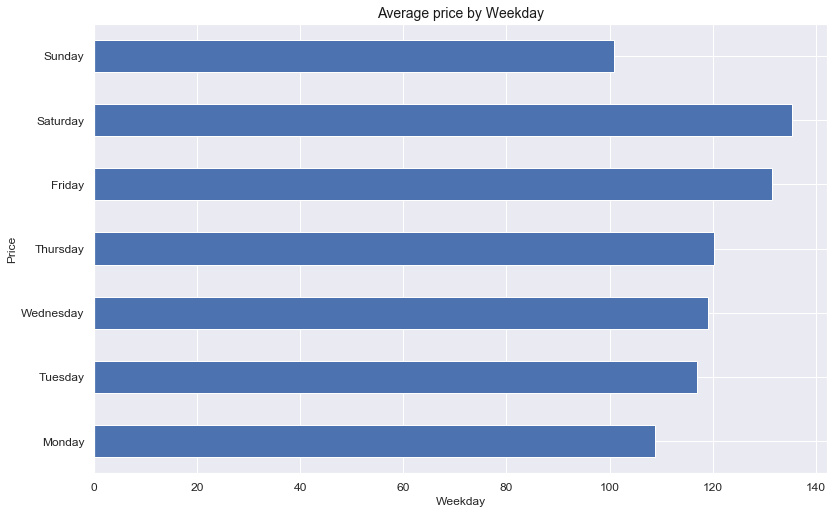

In [329]:
fig = weekday_mean.netPrice.plot(kind="barh", fig=(6,4));
#sns.barplot(y="netPrice", data=weekday_mean)
fig.set_title('Average price by Weekday')
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.show(fig)
# TODO: print mean

In [330]:
month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_mean = hotels_df.groupby("month").mean()
# To be ordered by weekday
month_mean = month_mean.loc[month_names]

In [331]:
month_mean

,score,advance,netPrice,longitude,latitude
month,,,,,
January,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN,NaN
July,8.4596,7.0000,109.9309,-0.3674,39.4701
August,8.5016,14.2785,119.4202,-0.3681,39.4690
September,8.4950,43.2423,132.0158,-0.3668,39.4686


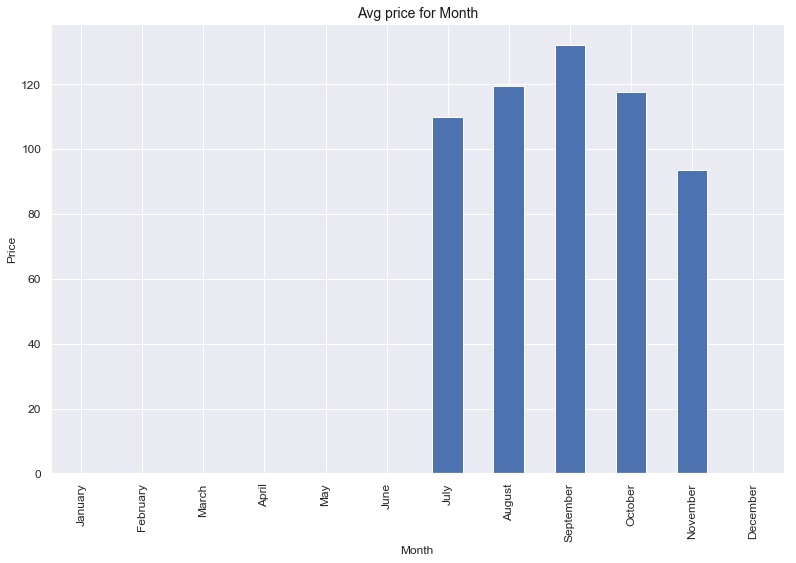

In [332]:
fig = month_mean.netPrice.plot(kind="bar", fig=(10,4));
fig.set_title('Avg price for Month')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show(fig)

In [201]:
#plt.figure(figsize=(16, 6))
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#fig.suptitle('Average Price', fontsize=16)
#ax2.set_title('Instances')
#ax2 = month_mean.netPrice.plot(kind="bar")
#ax1 = month_mean.netPrice.plot(kind="bar")
#plt.show()

### Stars

In [333]:
stars_df = hotels_df[["name","stars"]]
# Drop duplicates
stars_df.drop_duplicates(keep='first', inplace=True)

In [334]:
stars_df.head()

,name,stars
propertyId,,
12656,Sol Playa,2 star
13270,Melia Plaza Valencia,4 star
14441,Hotel Turia,4 star
14580,El Coso,3 star
23332,Hotel Miramar,2 star


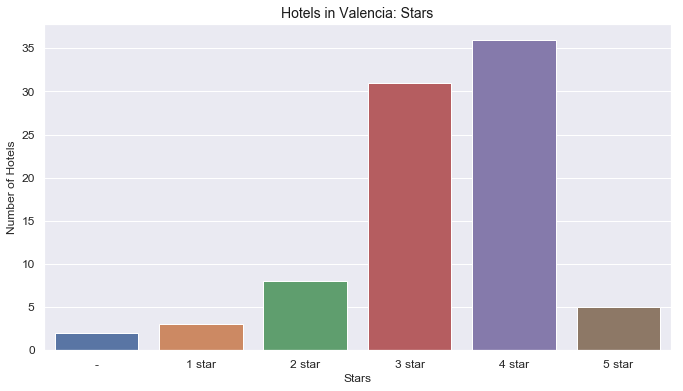

In [335]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x="stars", data=stars_df)
fig.set_title('Hotels in Valencia: Stars', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Stars")
plt.ylabel("Number of Hotels");

As we can see from the visualization 4 star hotels are the most commonly ones followed by 3 star.

In [336]:
hotels_NA_stars = hotels_df.query("stars=='-'")
hotels_1_star = hotels_df.query("stars=='1 star'")
hotels_2_star = hotels_df.query("stars=='2 star'")
hotels_3_star = hotels_df.query("stars=='3 star'")
hotels_4_star = hotels_df.query("stars=='4 star'")
hotels_5_star = hotels_df.query("stars=='5 star'")

In [337]:
hotels_2_star.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2 star,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2 star,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2 star,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


In [338]:
by_day_month = (hotels_2_star
            .groupby(['name', 'weekday'])
            .mean()
            .unstack()
           )
by_day_month

score                                    \
weekday                            Friday  Monday Saturday  Sunday Thursday   
name                                                                          
Ad Hoc Carmen                      8.9000  8.9000   8.9000  8.9000   8.9000   
Casual De La Música Valencia       7.4385  7.4294   7.4357  7.4294   7.4267   
Casual Del Cine Valencia           8.6000  8.6000   8.6000  8.6000   8.6000   
Casual Vintage Valencia            8.5000  8.5000   8.5000  8.5000   8.5000   
Hotel Miramar                         NaN  8.4000      NaN  8.4000   8.4000   
Md Design Hotel - Portal Del Real  9.1000  9.1000   9.1000  9.1000   9.1000   
Sol Playa                          8.3000  8.3000   8.3000  8.3000   8.3000   
Sweet Hotel Continental            8.3000  8.3000   8.3000  8.3000   8.3000   

                                                     advance           \
weekday                           Tuesday Wednesday   Friday   Monday   
name                                                                    
Ad Hoc Carmen                      8.9000    8.9000  23.1667  46.3846   
Casual De La Música Valencia       7.4417    7.4313  44.7692  44.2941   
Casual Del Cine Valencia           8.6000    8.6000  39.5625  42.2222   
Casual Vintage Valencia            8.5000    8.5000  37.6875  42.2222   
Hotel Miramar                      8.4000    8.4000      NaN  51.7857   
Md Design Hotel - Portal Del Real  9.1000    9.1000  39.5625  42.2222   
Sol Playa                          8.3000    8.3000  60.0000  50.1429   
Sweet Hotel Continental            8.3000    8.3000  38.2000  41.4375   

                                            ... longitude                    \
weekday                           Saturday  ...  Thursday Tuesday Wednesday   
name                                        ...                               
Ad Hoc Carmen                      37.0000  ...   -0.3762 -0.3762   -0.3762   
Casual De La Música Valencia       42.0714  ...   -0.3789 -0.3789   -0.3789   
Casual Del Cine Valencia           38.2000  ...   -0.3776 -0.3776   -0.3776   
Casual Vintage Valencia            40.2000  ...   -0.3766 -0.3766   -0.3766   
Hotel Miramar                          NaN  ...   -0.3237 -0.3237   -0.3237   
Md Design Hotel - Portal Del Real  40.7647  ...   -0.3723 -0.3723   -0.3723   
Sol Playa                          60.0000  ...   -0.3238 -0.3238   -0.3238   
Sweet Hotel Continental            39.7333  ...   -0.3746 -0.3746   -0.3746   

                                  latitude                             \
weekday                             Friday   Monday Saturday   Sunday   
name                                                                    
Ad Hoc Carmen                      39.4775  39.4775  39.4775  39.4775   
Casual De La Música Valencia       39.4700  39.4700  39.4700  39.4700   
Casual Del Cine Valencia           39.4691  39.4691  39.4691  39.4691   
Casual Vintage Valencia            39.4713  39.4713  39.4713  39.4713   
Hotel Miramar                          NaN  39.4643      NaN  39.4643   
Md Design Hotel - Portal Del Real  39.4770  39.4770  39.4770  39.4770   
Sol Playa                          39.4651  39.4651  39.4651  39.4651   
Sweet Hotel Continental            39.4698  39.4698  39.4698  39.4698   

                                                               
weekday                           Thursday  Tuesday Wednesday  
name                                                           
Ad Hoc Carmen                      39.4775  39.4775   39.4775  
Casual De La Música Valencia       39.4700  39.4700   39.4700  
Casual Del Cine Valencia           39.4691  39.4691   39.4691  
Casual Vintage Valencia            39.4713  39.4713   39.4713  
Hotel Miramar                      39.4643  39.4643   39.4643  
Md Design Hotel - Portal Del Real  39.4770  39.4770   39.4770  
Sol Playa                          39.4651  39.4651   39.4651  
Sweet Hotel Continental            39.4698  39.4

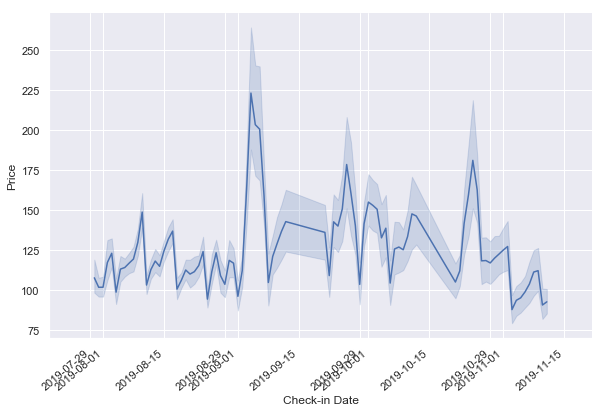

In [77]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_4)
# ha: horizontal alignment
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");
g.ax.margins(x=0.1, y=0.05)

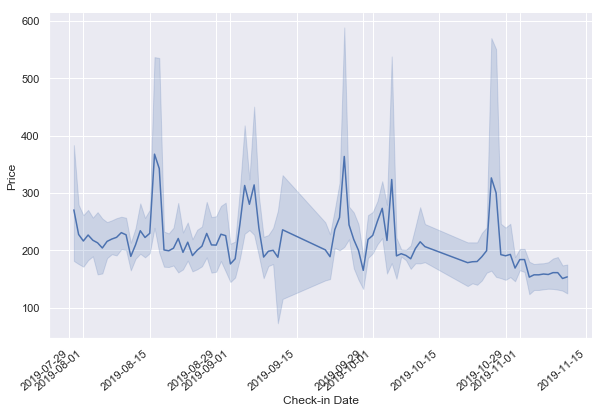

In [78]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_5)
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");

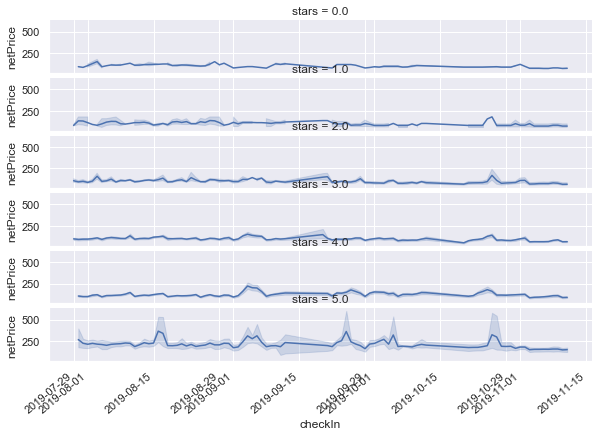

In [79]:
g = sns.relplot(x="checkIn", y="netPrice", row="stars", kind="line", data=df_hotels);
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)

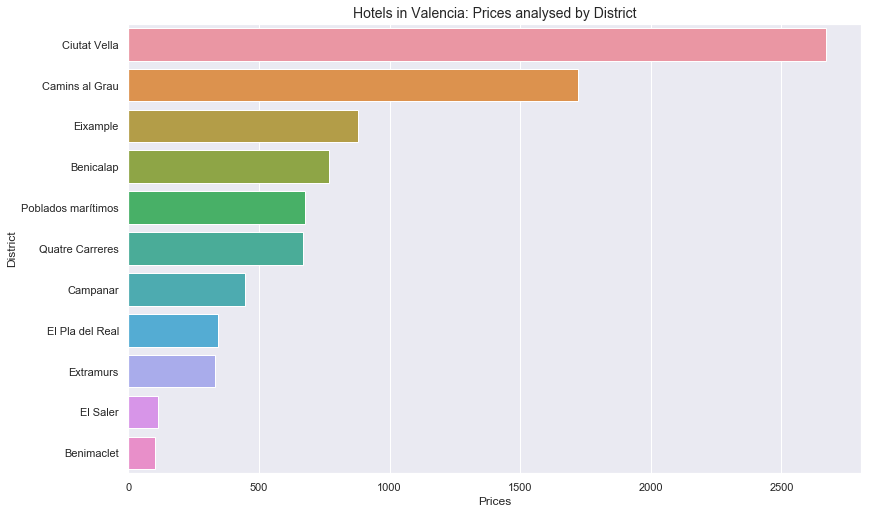

In [199]:
fig = sns.countplot(y="district", data=df_hotels, order = df_hotels['district'].value_counts().index)
fig.set_title(label='Hotels in Valencia: Prices analysed by District', \
              fontdict={'fontsize': mpl.rcParams['axes.titlesize'], 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Prices")
plt.ylabel("District")
plt.show(fig)

In [81]:
district_mean = df_hotels.groupby("district")

In [82]:
district_mean

In [200]:
# Mean price per district
district_mean = df_hotels.groupby("district").mean()
# To be ordered by district
district_mean = district_mean.loc[district_names]
district_mean

,score,advance,netPrice,longitude,latitude
district,,,,,
Algirós,NaN,NaN,NaN,NaN,NaN
Benicalap,8.2108,40.3919,95.9440,-0.4066,39.4956
Benimaclet,8.4000,41.4020,70.4706,-0.3632,39.4852
Camins al Grau,8.4568,41.4023,104.5628,-0.3499,39.4615
Campanar,8.0609,39.9888,89.4263,-0.3902,39.4804
Ciutat Vella,8.7164,40.7178,133.3885,-0.3755,39.4727
Eixample,8.6236,40.5125,128.6310,-0.3703,39.4661
El Pla del Real,8.3962,40.3265,158.0196,-0.3589,39.4730
Extramurs,8.6940,40.3444,117.8489,-0.3820,39.4699


In [84]:
#fig = sns.countplot(y="district", data=district_mean, order = district_mean['district'].value_counts().index)
#fig.set_title(label='Hotels in Valencia: Prices analysed by District', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
# 'fontweight': mpl.rcParams['axes.titleweight']})
#plt.xlabel("Prices")
#plt.ylabel("District")
#plt.show(fig)

According to the dataset, we have latitude and longitude on the dataset for each hotel. We are going to see the common location and how the hotels are placed.

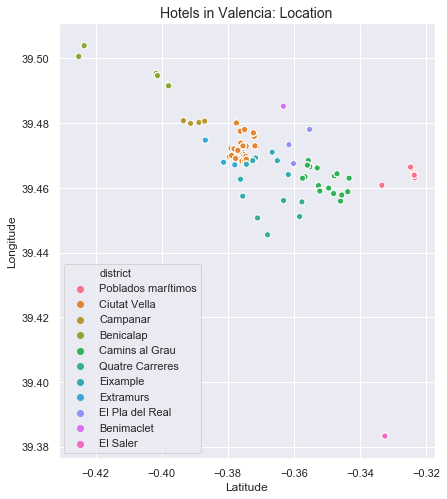

In [85]:
#df_hotels.groupby(["a", "name"]).median().index.get_level_values(1)
plt.figure(figsize=(6,8))

#fig = sns.scatterplot(x="longitude", y="latitude", hue="district", style="district", data=df_hotels);
fig = sns.scatterplot(x="longitude", y="latitude", hue="district", data=df_hotels);
fig.set_title(label='Hotels in Valencia: Location', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show(fig)

In [86]:
#plt.figure(figsize=(10,10))
#ax = sns.countplot(x="district", hue="stars", data=df_hotels)

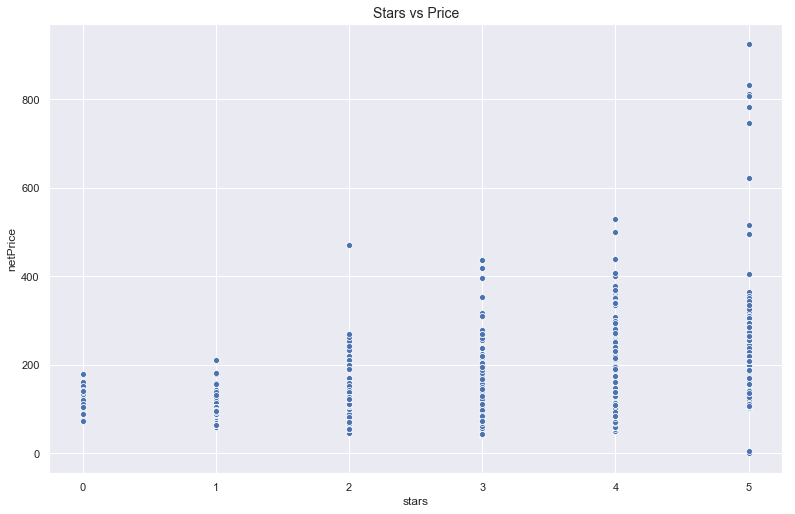

In [87]:
ax = sns.scatterplot(x="stars", y="netPrice", data=df_hotels).set_title('Stars vs Price')

In [88]:
df_hotels['checkIn'].min(), df_hotels['checkIn'].max()

(Timestamp('2019-07-29 00:00:00'), Timestamp('2019-11-11 00:00:00'))

In [89]:
df_hotels['netPrice'].min(), df_hotels['netPrice'].max()

(1.152999997138977, 924.0)

In [90]:
# Mean price per stars
stars_mean = df_hotels.groupby("stars").mean()
stars_mean

,score,advance,netPrice,longitude,latitude
stars,,,,,
0.0,9.1363,42.8493,104.4726,-0.3666,39.4671
1.0,8.0559,41.6725,103.6550,-0.3556,39.4655
2.0,8.4508,42.1372,100.5489,-0.3662,39.4709
3.0,8.4337,41.6173,102.4271,-0.3683,39.4673
4.0,8.5078,40.1447,123.2529,-0.3691,39.4698
5.0,8.8360,40.8493,217.6096,-0.3578,39.4709


In [91]:
# Mean price per month
df_hotels.groupby(df_hotels['checkIn'].dt.strftime('%B'))['netPrice'].mean().sort_values()

checkIn
November      94.7699
July         109.9309
October      119.1602
August       119.8514
September    130.9162
Name: netPrice, dtype: float32

In [92]:
df_hotels.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2.0,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2.0,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2.0,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


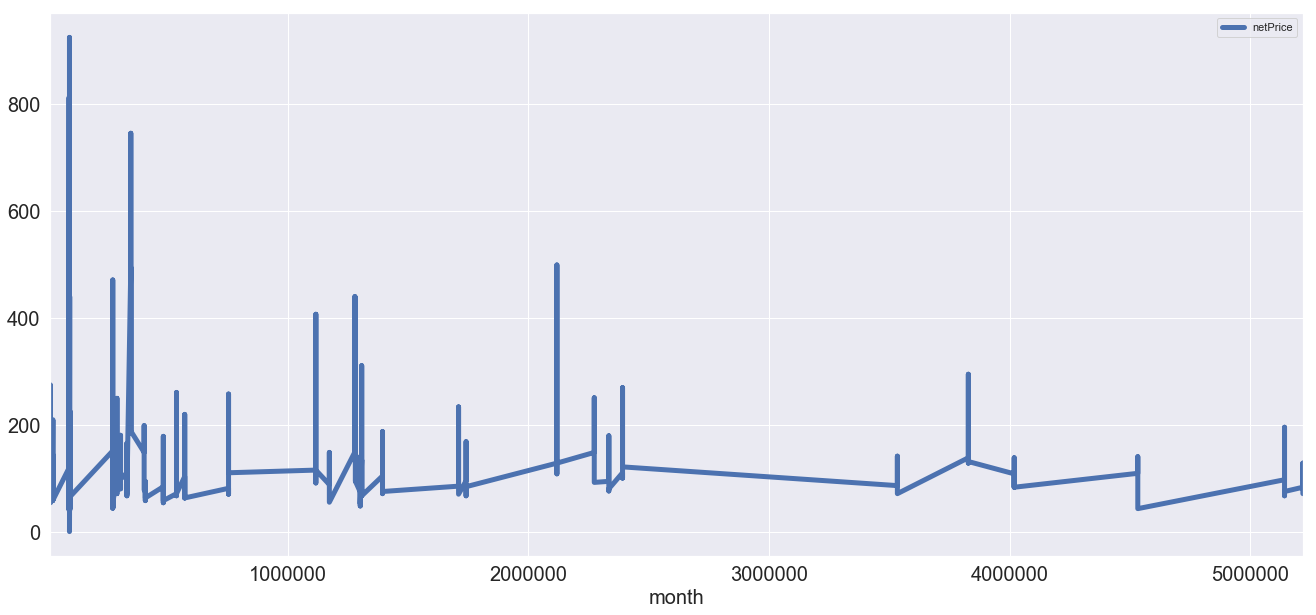

In [93]:
df_hotels[['netPrice']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('month', fontsize=20);

In [94]:
df_price = df_hotels.groupby('checkIn')['netPrice'].mean().reset_index()

In [95]:
# Indexing with Time Series Data
df_price = df_price.set_index('checkIn')
df_price.index

DatetimeIndex(['2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01',
               '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
               '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17',
               '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29',
      

In [96]:
y = df_price['netPrice'].resample('MS').mean()

In [97]:
y

checkIn
2019-07-01    108.4554
2019-08-01    120.0574
2019-09-01    133.8054
2019-10-01    118.9088
2019-11-01     95.5096
Freq: MS, Name: netPrice, dtype: float32

In [98]:
rng = pd.date_range('1/1/2019', periods=10, freq='MS')

In [99]:
rng

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex